In [268]:
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft

In [269]:
alpha = 1 + 260%3
print(alpha)

3


# Problem 1

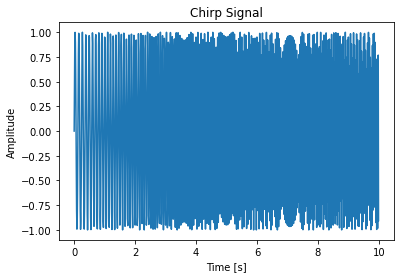

In [270]:
lowf = 2 + 2*alpha 
highf = 5 + 5*alpha
Fs = 100
t_duration = 10
T = 1/Fs
N_samples = Fs * t_duration
n = np.arange(N_samples)
f_t = lowf + n*T*(highf - lowf)/10

chirp = np.sin(2 * np.pi * f_t * n * T)

plt.plot(n*T, chirp)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Chirp Signal")
plt.savefig("Q1_1")

In [271]:
print(lowf)
print(highf)

8
20


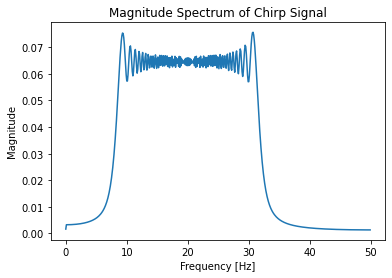

In [272]:
dft_chirp = np.fft.fft(chirp)[0:int(len(chirp)/2)]/len(chirp)
dft_chirp[1:] = 2 * dft_chirp[1:]
F_chirp = Fs * np.arange(len(chirp)/2)/len(chirp)

plt.plot(F_chirp,np.abs(dft_chirp))

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Chirp Signal")
plt.savefig("Q1_2")

Text(0.5, 1.0, 'Variation of Frequency with Time')

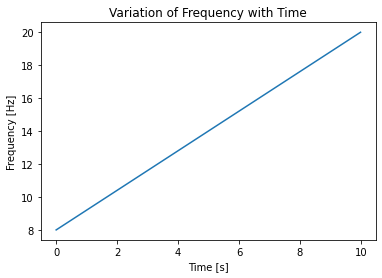

In [273]:
plt.plot(n * T, f_t)
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.title("Variation of Frequency with Time")

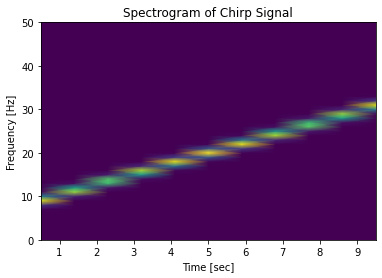

In [274]:
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 100, noverlap = 10 )

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of Chirp Signal")
plt.savefig("Q1_3")

In [275]:
print(len(chirp))

1000


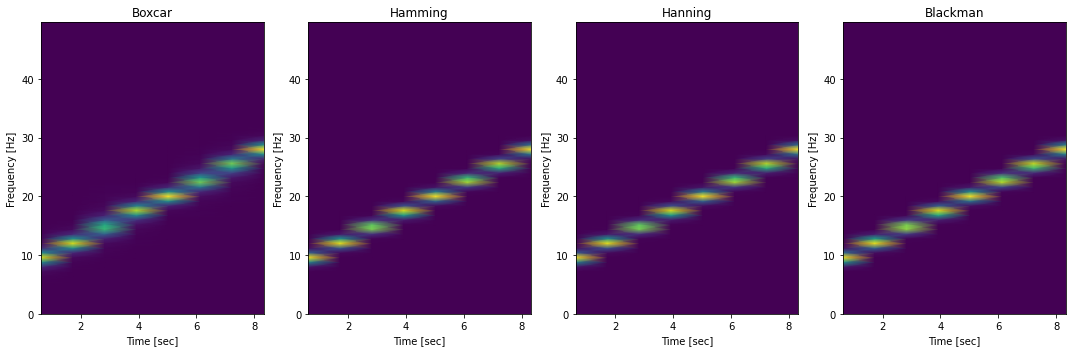

In [276]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4 ,2)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 125)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Hamming")
#plt.show()
plt.subplot(1, 4, 3)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hanning", nperseg = 125)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Hanning")
#plt.show()
plt.subplot(1, 4, 4)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "blackman", nperseg = 125)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Blackman")

plt.subplot(1, 4, 1)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "boxcar", nperseg = 125)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Boxcar")
#plt.show()
plt.tight_layout()
plt.savefig("Q1_4")

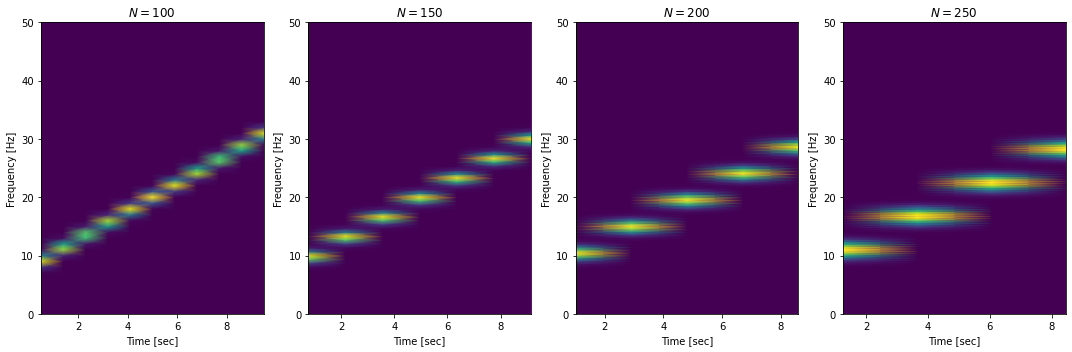

In [277]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 100, noverlap = 10 )

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("$N = 100$")
plt.subplot(1, 4, 2)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 150, noverlap = 10 )

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("$N = 150$")
plt.subplot(1, 4, 3)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 200, noverlap = 10 )

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("$N = 200$")
plt.subplot(1, 4, 4)
f, t, Sxx = sp.spectrogram(chirp, Fs, window = "hamming", nperseg = 250, noverlap = 10 )

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("$N = 250$")
plt.tight_layout()
plt.savefig("Q1_5")

# Problem 2

In [278]:
Fs_instrument, instrument_track = wavfile.read("instru3.wav")
IPython.display.Audio(instrument_track, rate = Fs_instrument)
instrument_track = instrument_track/32767.0
IPython.display.Audio(instrument_track, rate = Fs_instrument)

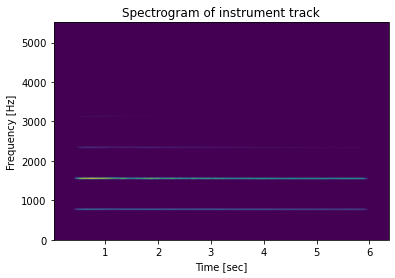

In [279]:
f, t, Sxx = sp.spectrogram(instrument_track, Fs_instrument, window = "hanning",nperseg = 512 ,noverlap = 128)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of instrument track")
plt.savefig("Q2_1")

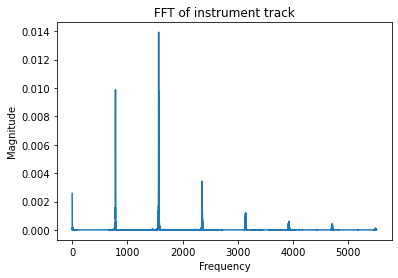

In [280]:
dft_instrument = np.fft.fft(instrument_track)[0 : int(len(instrument_track)/2)]/len(instrument_track)
dft_instrument[1 :] = 2 * dft_instrument[1 :]
F_instrument = Fs_instrument * np.arange(len(instrument_track)/2)/len(instrument_track)

plt.plot(F_instrument, abs(dft_instrument))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("FFT of instrument track")
plt.savefig("Q2_2")

In [281]:
v_trumpet = max(dft_instrument[5000 : 10000])
i_trumpet = list(dft_instrument).index(v_trumpet)
print(F_instrument[i_trumpet])
print(len(dft_instrument))

783.2778991262907
35252


In [286]:
Fs_opera, opera_track = wavfile.read("Opera.wav")
opera_track = opera_track/32767.0
IPython.display.Audio(opera_track, rate = Fs_opera)

/tmp/ipykernel_543234/1439321555.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs_opera, opera_track = wavfile.read("Opera.wav")


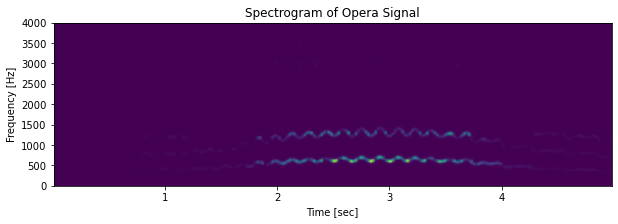

In [283]:

plt.figure(figsize=(10,3))
f, t, Sxx = sp.spectrogram(opera_track, Fs_opera, window = "hanning",nperseg = 200)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of Opera Signal")
plt.savefig("Q2_3")
#plt.ylim(0, 5000)

In [284]:
Fs_name, name = wavfile.read("dsp_p3.wav")
name = name/32767.0
IPython.display.Audio(name, rate = Fs_name)

/tmp/ipykernel_543234/1006458280.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs_name, name = wavfile.read("dsp_p3.wav")


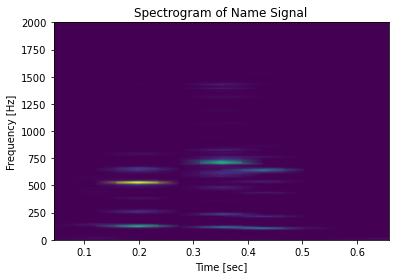

In [285]:
f, t, Sxx = sp.spectrogram(name, Fs_name, window = "hanning",nperseg = 350)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of Name Signal")
plt.savefig("Q3_1")